# Selecting datasets for research

In __Rio+20__ there are several records with students playing six different games. In this section a narrow dataset is selected to perform research.


## Tower of London 2018 dataset

Selects students at the year of 2018 playing tol the Tower of London game.

### Selector fixture

A class that enhance the general data structure visitor. Callbacks are devised to grasp Game, Goal and Trial levels

In [35]:
from activreader import Activ
from matplotlib import pyplot as plt
from datastructure import Sample
from datavisitor import Visitor


class Rio20Select:
    def __init__(self):
        self.games = {}
        self.selector = 'tol'
        self.trials = {}
        self.goals = {}
        self.activ_reader = activ_reader = Activ()
        self.sample = Sample(sample=[activ_reader.one_player(player) for player in activ_reader.get_jogadores()])
        self.visitor = Visitor(
            leaf_action=dict(game=self.count_game_play, goal=self.count_trials))
        
    def plot_stats(self, x, xticks, y, label="number of participants", title="count"):
        # print("plot_stats", x, xticks, y, self.games)
        fig = plt.figure()
        plt.xticks(x, xticks)
        fig.suptitle(title)
        plt.ylabel(label)
        _ = plt.bar(x, y)
        _ = plt.show()
                               
    def plot_trials(self):
        trials = sorted(self.trials.items())
        self.plot_stats(range(len(self.trials)), *zip(*trials), label="number of trials", title='Trials')
        return self
                               
    def plot_goals(self):
        goals = sorted(self.goals.items())
        self.plot_stats(range(len(self.goals)), *zip(*goals), label="number of goals", title='Goals')
        return self
                               
    def main(self, selector='tol'):
        self.games = {}
        self.selector = selector
        self.trials = {}
        self.goals = {}
        self.sample.visit(self.visitor)
        return self

    def count_goals(self, _, goal, **kwargs):
        # print("count_game_play", game, goal, name)
        n_trials = len(goal)
        self.goals.update({n_trials: self.goals.setdefault(n_trials, 0)+1})
        return True

    def count_trials(self, _, trial, **kwargs):
        # print("count_game_play", game, goal, name)
        n_trials = len(trial)
        self.trials.update({n_trials: self.trials.setdefault(n_trials, 0)+1})
        return False

    def count_game_play(self, game, goal, name, **kwargs):
        # print("count_game_play", game, goal, name)
        if name == self.selector:
            self.games.update({name: self.games.setdefault(name, 0)+1})
            self.count_goals(game, goal=goal)
            return True
        return False

rio = Rio20Select()
rio = rio.main()


### Accounting TOL trials

The plot shows how many students have tried the number of attempts in X axis

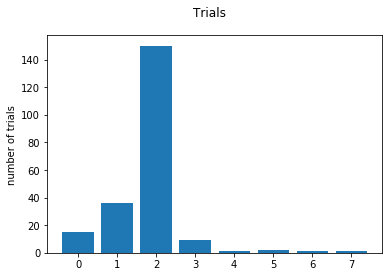

In [18]:
_ = rio.plot_trials()

### Accounting TOL goals

TOL goals are the number of levels available, with increasing difficulty. The plot shows how many students have tried the number of goals in X axis

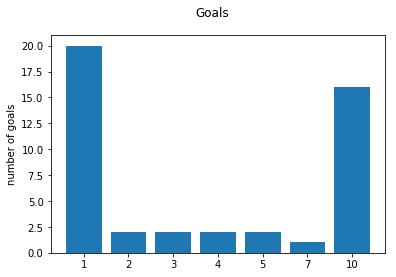

In [21]:
_ = rio.plot_goals()

## Wisconsin Card test 2018 dataset

### Wisconsin dataset selector

In [30]:
_ = rio.main(selector="wisconsin")

### Accounting wisconsin goals

Wisconsin is a single level game, only one goal is available to play

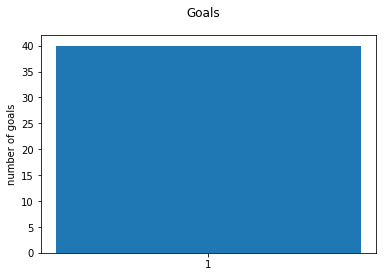

In [26]:

_ = rio.plot_goals()

## Accounting wisconsin trials

Although having a single goal, the goal may be executed in any amount of trials.

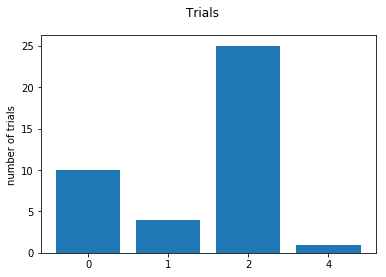

In [31]:
_ = rio.plot_trials()

## Train manouvering game 2018 dataset

### Train manouvering dataset selector

In [36]:
_ = rio.main(selector="trainz")

### Accounting train trials

Although having a single goal, the goal may be executed in any amount of trials.

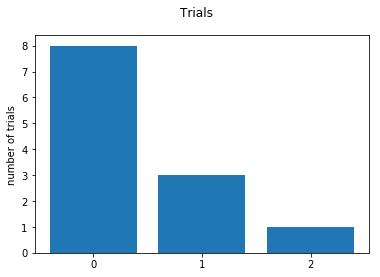

In [34]:
_ = rio.plot_trials()

### Accounting train goals

Train is a single level game, only one goal is available to play

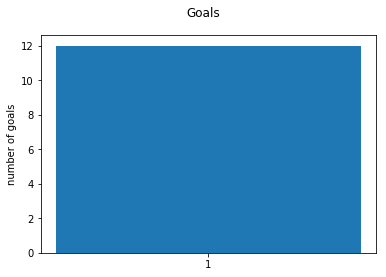

In [37]:
_ = rio.plot_goals()